### Project 1: Visualizing a Linear Transformation
#### Objective: Visualize how a matrix multiplication transforms a set of vectors.

##### Step 1: Import libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt

##### Step 2: Define a grid of vectors (points in 2D plane)

In [31]:
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# np.linspace(-2, 2, 20) creates 20 evenly spaced numbers from -2 to 2
# np.meshgrid(x, y) forms a grid — like drawing horizontal and vertical lines to create many points in 2D space


##### Step 3: Flatten the grid into coordinate pairs

In [39]:
points = np.vstack([X.flatten(), Y.flatten()])

# np.vstack() means “vertical stack” — like stacking layers in a sandwich
# Stack vertically (add rows)
# .flatten() turns a 2D array into a 1D array

##### Step 4: Define a 2x2 Transformation Matrix (rotation + scaling)

In [27]:
# Rotate by 30° and scale by 1.2

theta = np.radians(30)
scale = 1.2
A = scale * np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta),  np.cos(theta)]])
print(A)
# np.radians(30) converts 30° to radians since NumPy uses radians not degree
# scale = 1.2 means we will stretch (enlarge) vectors by 20%
# Multiplying by scale makes it a rotation + scaling matrix
# 30° = π/6 ≈ 0.524 radians


[[ 1.03923048 -0.6       ]
 [ 0.6         1.03923048]]


##### Step 5: Apply the Transformation

In [33]:
transformed_points = A @ points
# print(transformed_points)
# Each point (column in points) is multiplied by the transformation matrix A

##### Step 6:  Visualize the original and transformed grids

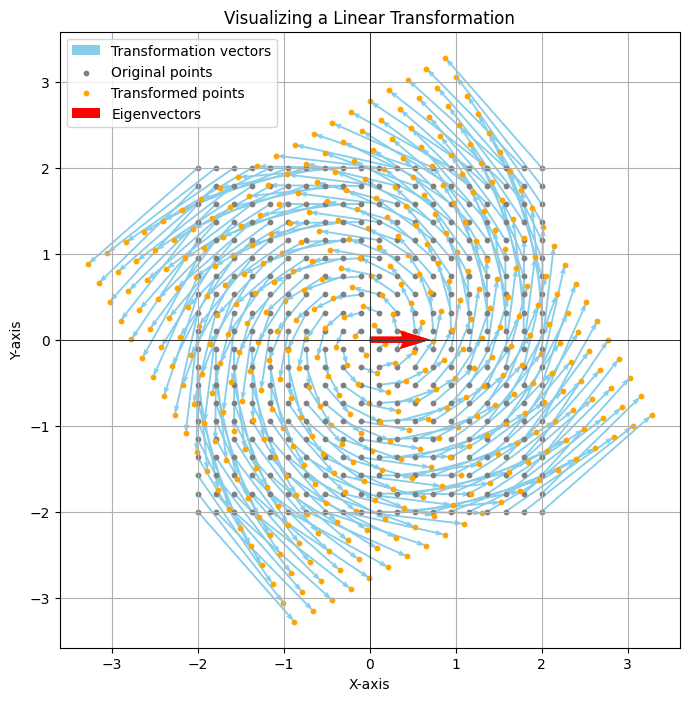

In [ ]:
# Visualize the original and transformed grids

plt.figure(figsize=(8, 8))
plt.quiver(points[0], points[1], transformed_points[0] - points[0],
           transformed_points[1] - points[1],
           angles='xy', scale_units='xy', scale=1, color='skyblue', width=0.003, label="Transformation vectors")

plt.scatter(points[0], points[1], color='gray', s=10, label='Original points')
plt.scatter(transformed_points[0], transformed_points[1], color='orange', s=10, label='Transformed points')

# plt.quiver() draws arrow
# The base of each arrow is the original point (x, y)
# The direction shows how that point moved — the difference between transformed and original.
# It shows how the grid is stretched or rotated
# angles='xy'- The arrow angles match the x–y data - Use true x–y directions
# scale_units='xy' - The arrow lengths are correct - Use x–y units for arrow lengths
# scale=1 - Don’t shrink or stretch — draw arrows at their true size
# plt.scatter() - a type of graph -Plots dots for given (x, y) coordinates
# s=10 - dot size (small dots)
# =======================================================================

# Find Eigenvalues and Eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(A)

# Remove imaginary parts (keep only real numbers)
eigenvectors = np.real(eigenvectors)
eigenvalues = np.real(eigenvalues)

# Eigenvectors are the special directions that don’t rotate under transformation.
# Eigenvalues tell how much those vectors are stretched or shrunk
# =================================================================================

# Visualize Eigenvectors

origin = np.array([[0, 0], [0, 0]])  # origin for eigenvectors
plt.quiver(origin[0], origin[1], eigenvectors[0, :], eigenvectors[1, :],
           angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='Eigenvectors')

# eigenvectors[0, :] - first row and all columns - all X values
# eigenvectors[1, :] - second row and all columns - all Y values
# Row 1 → Y values
# Row 0 → X values
# Draws red arrows (eigenvectors) starting from the origin.
# They show directions that remain unchanged (only their length changes)
# =================================================================================================

# Add labels, grid, and legend

plt.title("Visualizing a Linear Transformation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# axis('equal') - the circle becomes perfectly round